**Model 2: Logistic Regression**

C:\Users\Rayed\AppData\Local\Temp\ipykernel_23412\1658054317.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'entertainment':0,'business':1,'sports':2,'science-technology':3,'world':4})


Accuracy:  95.0207468879668
F1:  0.9496705202299285
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.97      0.90      0.94        42
           2       0.98      1.00      0.99        51
           3       0.93      0.93      0.93        45
           4       0.93      0.93      0.93        55

    accuracy                           0.95       241
   macro avg       0.95      0.95      0.95       241
weighted avg       0.95      0.95      0.95       241



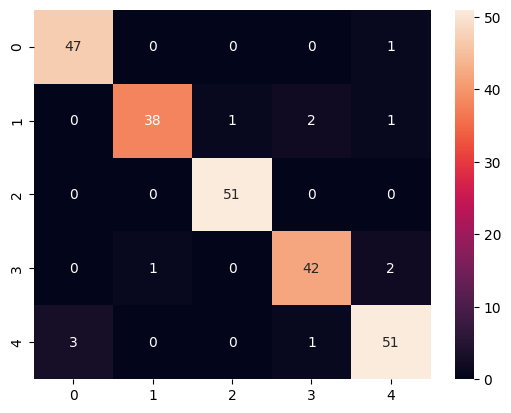

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

data = pd.read_csv('afterEDAFinal.csv')
X = data['content']
y = data['gold_label']  

vectorizer = TfidfVectorizer(max_features=11000)  
X_transformed = vectorizer.fit_transform(X).toarray()

data = data.replace({'entertainment':0,'business':1,'sports':2,'science-technology':3,'world':4})
y_transformed = data['gold_label']

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

class LogisticRegression:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(11000)
        self.bias = 1
        for i in range(0,self.epochs):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            gradient_weight = (1/len(X_train))*np.dot(X.T,(predictions - y))
            gradient_bias = (1/len(X_train))*np.sum(predictions - y)
            self.weights = self.weights-(self.lr*gradient_weight)
            self.bias = self.bias-(self.lr*gradient_bias)
            
    def predict(self,X):
        hypothesis_func = np.dot(X, self.weights)+self.bias
        prob = self.sigmoid(hypothesis_func)
        label = 0
        if prob>=0.5:
            label = 1
        return label, prob
    
    def evaluate(self,y_true,y_pred):
        conf = confusion_matrix(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)*100
        f1 = f1_score(y_true, y_pred, average='macro')
        return conf,accuracy,f1

class1 = LogisticRegression(0.1,2000) 
class2 = LogisticRegression(0.1,2000) 
class3 = LogisticRegression(0.1,2000) 
class4 = LogisticRegression(0.1,2000) 
class5 = LogisticRegression(0.1,2000) 

classifiers = [class1,class2,class3, class4,class5]
classes = ['entertainment','business','sports','science-technology','world']

for i in range(5):
    y_binary = (y_train == i).astype(int) 
    classifiers[i].fit(X_train,y_binary)       

results = {
    'Class': [],
    'Probs':[],
}
for i in range(5):  
    y_binary = (y_test == i).astype(int) 
    predicted_labels = []
    probabilities = []
    for test_feature in X_test:
        predicted_class, probability = classifiers[i].predict(test_feature)     
        predicted_labels.append(predicted_class)
        probabilities.append(probability)
    cm, accuracy, f1 = classifiers[i].evaluate(y_binary,predicted_labels) 
    results['Class'].append(i)
    results['Probs'].append(probabilities)
results_df = pd.DataFrame(results)
p = 0
predictions = []
for test_ in X_test:
    prob1 = results_df.loc[0,'Probs'][p]
    prob2 = results_df.loc[1,'Probs'][p]
    prob3 = results_df.loc[2,'Probs'][p]
    prob4 = results_df.loc[3,'Probs'][p]
    prob5 = results_df.loc[4,'Probs'][p]

    prob = [prob1,prob2,prob3,prob4,prob5]
    label = np.argmax(prob)
    predictions.append(label)
    p = p + 1
#------------evaluation------------------
conf = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)*100
f1 = f1_score(y_test, predictions, average='macro')
print("Accuracy: ",accuracy)
print("F1: ",f1)
sns.heatmap(conf,annot=True)
classification = classification_report(y_test,predictions)
print(classification)